In [1]:
import matplotlib.pyplot as plt
import numpy as np

## Exercise 1. Let bright to be brighter, let dark to be darker

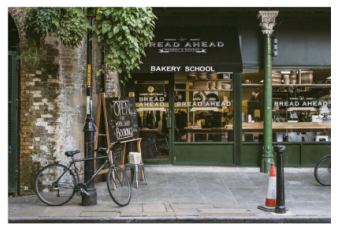

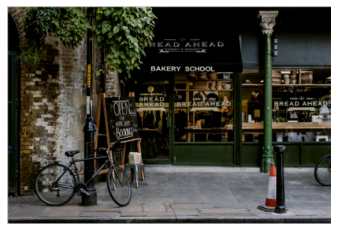

In [82]:
image = plt.imread('scene1.png')
plt.imshow(image)
plt.axis('off')
plt.show()

image = image * 255.0
image = image[:,:,:3]
image = np.clip(image.astype(np.float32) - 40, 0, 255).astype(np.uint8)
plt.imshow(image)
plt.axis('off')
plt.show()


##  Exercise 2. Improve contrast

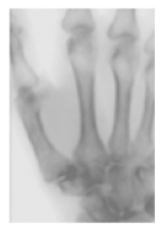

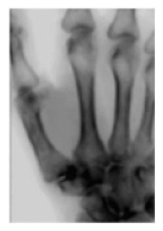

In [95]:
img2 = plt.imread('scene2.png')
plt.imshow(img2)
plt.axis('off')
plt.show()

img2 = img2 * 255.0
img2 = img2[:,:,:3]
img2 = img2 - img2.min()
img2 = img2 / (img2.max() - img2.min())
img2.astype(np.uint8)

plt.imshow(img2)
plt.axis('off')
plt.show()  

## Intensity vs. color transformations

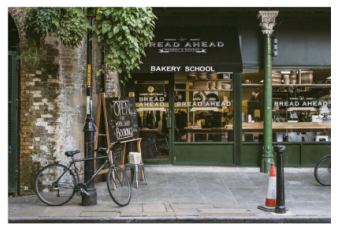

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


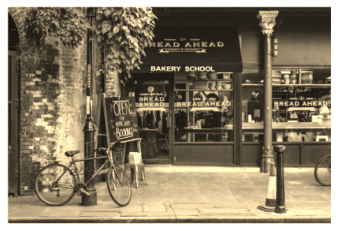

In [115]:
img3 = plt.imread('scene1.png')
color_trans = np.array([[0.189, 0.168, 0.131],
                        [0.769, 0.686, 0.534],
                        [0.393, 0.349, 0.272]])
if img3.shape[-1] == 4:
    img3 = img3[:,:,:3]
plt.imshow(img3)
plt.axis('off')
plt.show()

img3_reshape = img3.reshape(-1, 3)
img3_trans = np.matmul(img3_reshape, color_trans)
img3_trans = img3_trans.reshape(img3.shape)

plt.imshow(img3_trans)
plt.axis('off')
plt.show()

## No-linear transfer function

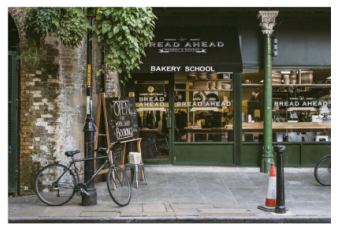

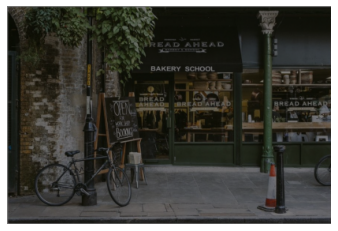

In [148]:
img4 = plt.imread('scene1.png')
plt.imshow(img4)
plt.axis('off')
plt.show()

img4 = img4[:,:,:3]
img4 = img4 * 255.0
f1 = np.arange(255) // 2
img4_int = img4.astype(np.int32)
img4_int = np.clip(img4_int, 0, 254)

img4_out = f1[img4_int]
plt.imshow(img4_out)
plt.axis('off')
plt.show()


## no-linear transform: more red and less blue

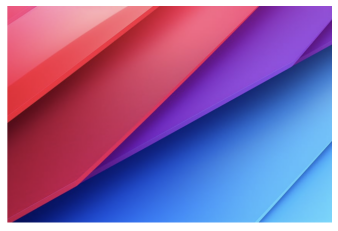

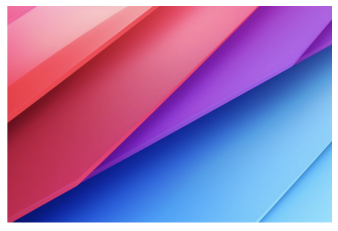

In [157]:
img4 = plt.imread('scene3.png')
plt.imshow(img4)
plt.axis('off')
plt.show()

img4 = img4[:,:,:3]
img4 = img4 * 255.0

# more red less blue
f1 = np.zeros(256)
f1[:64] = np.linspace(0, 80, 64)
f1[64:128] = np.linspace(80, 160, 64)
f1[128:256] = np.linspace(160, 255, 128)

img4_int = img4.astype(np.int32)
img4_int = np.clip(img4_int, 0, 255)

img4_out = f1[img4_int]
plt.imshow(img4_out.astype(np.uint8))
plt.axis('off')
plt.show()


## Cumulative distribution function (CDF)

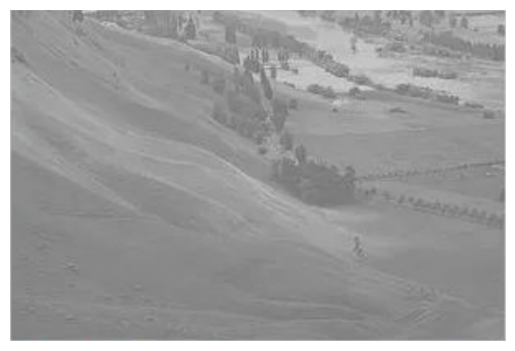

(608, 911, 4)


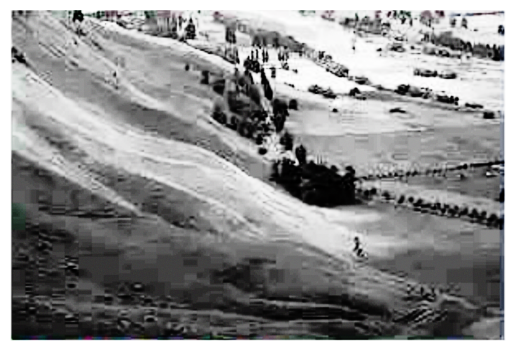

In [3]:
img5 = plt.imread('scene4.png')
plt.imshow(img5)
plt.axis('off')
plt.show()

img5 = img5[:,:,:3]
img5 = img5 * 255.0
img5_int = img5.astype(np.int32)


img5_out = np.zeros_like(img5_int)
for i in range(3):
    hist, bins = np.histogram(img5_int[:,:,i],bins = np.arange(257))
    img5_cdf = np.cumsum(hist)
    img5_cdf_min = img5_cdf.min()
    img5_cdf_normalized = (img5_cdf - img5_cdf_min) / (img5_cdf[-1] - img5_cdf_min) * 255
    img5_out[:,:,i] = img5_cdf_normalized[img5_int[:,:,i]]

plt.imshow(img5_out.astype(np.uint8))
plt.axis('off')
plt.show()



## Median filter

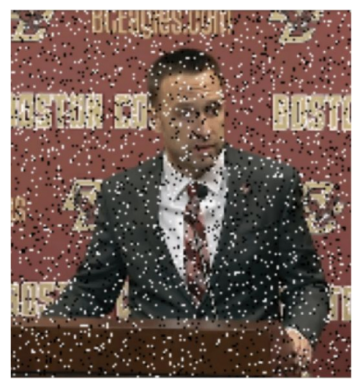

/Users/remote_cheng/Library/Python/3.8/lib/python/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/remote_cheng/Library/Python/3.8/lib/python/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in true_divide
  ret = ret.dtype.type(ret / rcount)


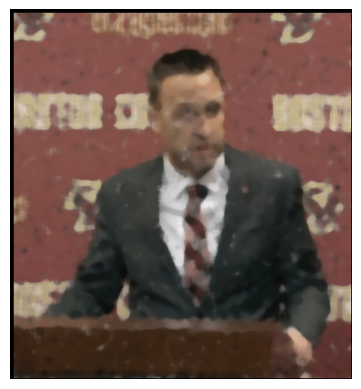

In [3]:
img6 = plt.imread('scene5.png')
plt.imshow(img6)
plt.axis('off')
plt.show()

img6 = img6[:,:,:3]
img6 = img6 * 255.0
img6 = img6.astype(np.float32)

# median filter on patch size 10x10
img6_out = np.zeros_like(img6)
for i in range(1, img6.shape[0]-1):
    for j in range(1, img6.shape[1]-1):
        for k in range(3):
            img6_out[i,j,k] = np.median(img6[i-5:i+5,j-5:j+5,k])
            
img6_out = img6_out.astype(np.uint8)
plt.imshow(img6_out)
plt.axis('off')
plt.show()

## coneected components

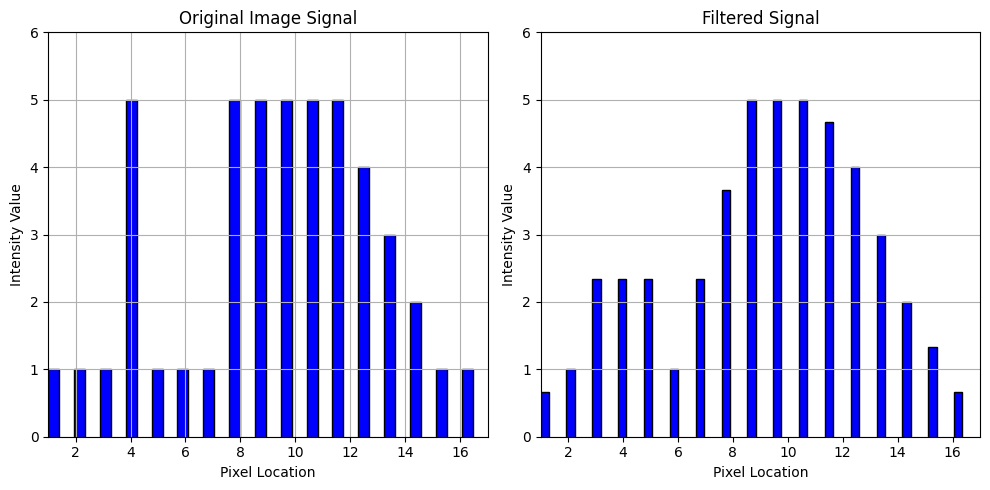

In [16]:
# Define the original image signal and the filtered signal
original_signal = [1, 1, 1, 5, 1, 1, 1, 5, 5, 5, 5, 5, 4, 3, 2, 1, 1]
filtered_signal = [2/3, 1, 7/3, 7/3, 7/3, 1, 7/3, 11/3, 5, 5, 5, 14/3, 4, 3, 2, 4/3, 2/3]

# Define the pixel locations (horizontal axis)
pixel_locations = list(range(1, 18))

# Create the plots with a narrower figure and narrower bars
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Plot the original signal as a histogram
ax1.hist(pixel_locations, bins=len(original_signal), weights=original_signal, color='b', edgecolor='black', width=0.4)
ax1.set_title('Original Image Signal')
ax1.set_xlabel('Pixel Location')
ax1.set_ylabel('Intensity Value')
ax1.set_xlim([1, 17])
ax1.set_ylim([0, 6])
ax1.grid(axis='x')  # Only vertical grid lines
ax1.yaxis.grid(True)  # Only horizontal grid lines

# Plot the filtered signal as a histogram
ax2.hist(pixel_locations, bins=len(filtered_signal), weights=filtered_signal, color='b', edgecolor='black', width=0.3)
ax2.set_title('Filtered Signal')
ax2.set_xlabel('Pixel Location')
ax2.set_ylabel('Intensity Value')
ax2.set_xlim([1, 17])
ax2.set_ylim([0, 6])
# ax2.grid(axis='x')  # Only vertical grid lines
ax2.yaxis.grid(True)  # Only horizontal grid lines

# Show the plots
plt.tight_layout()
plt.show()


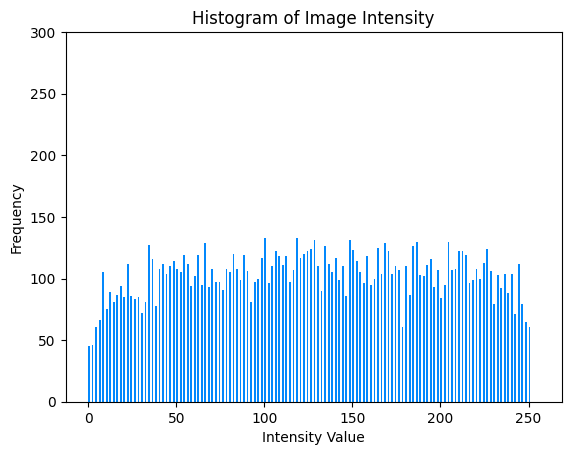

In [57]:
import math
# 读取图像
h2Image = plt.imread('h4.png')
h2Image = h2Image[:,:,:3] 
h2Image = h2Image * 255.0

# 去掉值为255的像素
h2Image = h2Image[h2Image <= 250]
h2Image = h2Image[h2Image %2 != 1]

# 画直方图
plt.hist(h2Image.flatten(), bins=256, range=(0, 256), color='#0388fc')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')
plt.ylim([0, 300])
plt.title('Histogram of Image Intensity')
plt.grid(False)
plt.show()
